In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('DATA_Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
df_f = df.fillna(0)
df_f

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [9]:
df_f['Churn'] = df_f['Churn'].replace({'Yes': 1, 'No': 0})

In [10]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = df_f[features]
y = df_f['Churn']

In [17]:
log_model = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

s = StandardScaler()
s.fit(X_train)
X_train_log = s.transform(X_train)
X_test_log = s.transform(X_test)



log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



,Error_metric,Train,Test
0,Accuracy,0.788605,0.802697
1,Precision,0.645631,0.695312
2,Recall,0.446009,0.470899


In [35]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results
numerical = df_f.select_dtypes(np.number)
numerical.dropna(inplace=True)

In [36]:
X_2 = numerical.drop(columns=['Churn'])
y_2 = numerical['Churn']

y_2 = y_2.apply( lambda x : 1 if x==0 else 0)
y_2.value_counts()

1    5174
0    1869
Name: Churn, dtype: int64

In [42]:
X_2_train, X_2_test, y_2_train, y_2_test=train_test_split(X_2, y_2, test_size=TT_SPLIT,random_state=RAND_STATE)

model = KNeighborsClassifier(n_neighbors=12) # declare we're using knn classification model
model.fit(X_2_train, y_2_train) # train model
y_2_pred = model.predict(X_2_test.values) # predict test
y_2_pred_train=model.predict(X_2_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_2_train, y_2_pred_train),
                                         precision_score(y_2_train, y_2_pred_train),
                                         recall_score(y_2_train, y_2_pred_train)],
                               'Test': [accuracy_score(y_2_test, y_2_pred),
                                        precision_score(y_2_test, y_2_pred),
                                        recall_score(y_2_test, y_2_pred)]})

display(performance_log)

C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.814519,0.773598
1,Precision,0.844317,0.814079
2,Recall,0.918009,0.888670


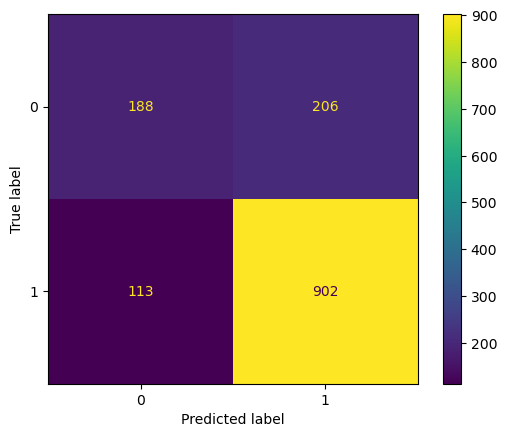

In [43]:
cm = confusion_matrix(y_2_test, y_2_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [45]:
sample = pd.DataFrame(X_test_log).sample()
log_model.predict(sample)

array([0], dtype=int64)

In [46]:
log_model.predict_proba(sample) #probability #when [0] possiblity left,not possibility right

array([[0.94003864, 0.05996136]])